# Exercise
You are given bhp.csv which contains property prices in the city of banglore, India. You need to examine price_per_sqft column and do following,

(1) Remove outliers using percentile technique first. Use [0.001, 0.999] for lower and upper bound percentiles

(2) After removing outliers in step 1, you get a new dataframe.

(3) On step(2) dataframe, use 4 standard deviation to remove outliers

(4) Plot histogram for new dataframe that is generated after step (3). Also plot bell curve on same histogram

(5) On step(2) dataframe, use zscore of 4 to remove outliers. This is quite similar to step (3) and you will get exact same result

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8)

df = pd.read_csv('03_bhp.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [3]:
df.price_per_sqft.describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

Above, you can see max is 12000000, which is too much price for price per sqft. Looks like this dataset has some very bad outliers so we will first remove those with percentile and then use z score


Also plot histogram to see how is the data distribution

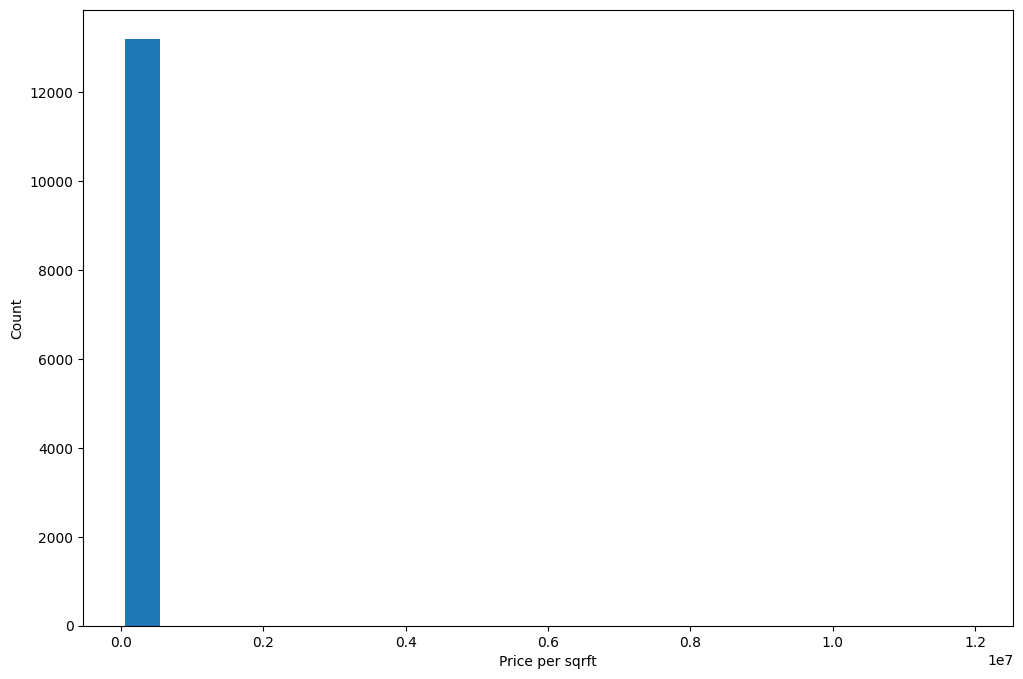

In [4]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per sqrft')
plt.ylabel('Count')
plt.show()

Above chart confirms our understanding that this dataset has some bad outliers. Because we see only one bar with more than 12000 data points but on the right hand side there are data points that have higher value for price per sqft but count of these data points is very tiny compared to 12000 hence we can hardly see any bar

Using log scale can make visualization little better

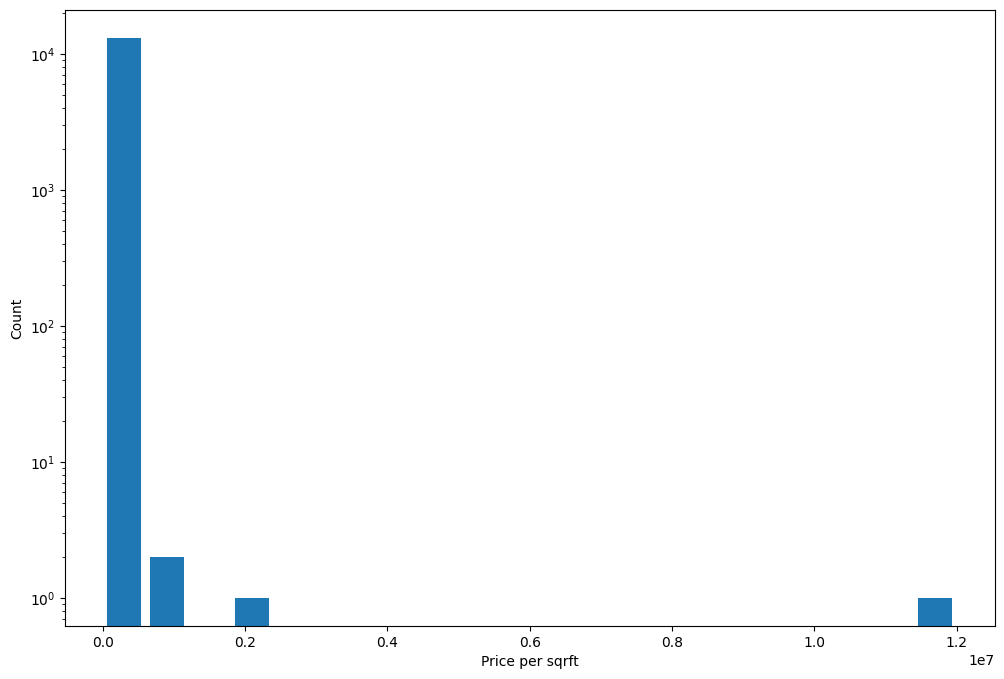

In [5]:
plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per sqrft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

You see atleast few bars on right hand side of our highest building at least :)

# (1) Treat outliers using percentile first

In [6]:
lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit

(1366.184, 50959.36200000098)

In [8]:
outliers = df[(df.price_per_sqft>upper_limit) | (df.price_per_sqft<lower_limit)]
outliers

,location,size,total_sqft,bath,price,bhk,price_per_sqft
345,other,3 Bedroom,11.0,3.0,74.0,3,672727
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
4044,Sarjapur Road,4 Bedroom,1.0,4.0,120.0,4,12000000
4924,other,7 BHK,5.0,7.0,115.0,7,2300000


Above shows properties that has price_per_sqft value such as 500 rs which is very very low for the city of banglore. You would be very lucky if you can find such as property :) Also we have properties that has price per sqft value such as 12000000 which is way too high. It seems almost impossible and even if it is legitimate it can help data analysis process if we remove such a data point

In [10]:
df2 = df[(df.price_per_sqft < upper_limit) & (df.price_per_sqft > lower_limit)]
df2.shape

(13172, 7)

In [11]:
df.shape

(13200, 7)

In [12]:
df.shape[0] - df2.shape[0]

28

**We removed total 28 outliers**

# (2) Now remove outliers using 4 standard deviation

In [13]:
max_limit = df2.price_per_sqft.mean() + 4*df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4*df2.price_per_sqft.std()

max_limit, min_limit

(np.float64(23227.73653589432), np.float64(-9900.429065502582))

In [15]:
df2[(df2.price_per_sqft > max_limit) | (df2.price_per_sqft < min_limit)]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333
190,Bellandur,4 Bedroom,1200.0,5.0,325.0,4,27083
733,Cunningham Road,4 BHK,5270.0,4.0,1250.0,4,23719
760,other,9 Bedroom,600.0,9.0,190.0,9,31666
...,...,...,...,...,...,...,...
13081,other,6 Bedroom,8000.0,6.0,2800.0,6,35000
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13127,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000


In [17]:
df3 = df2[(df2.price_per_sqft < max_limit) & (df2.price_per_sqft > lower_limit)]
df3.shape

(13047, 7)

In [19]:
df2.shape[0] - df3.shape[0]

125

In this step we removed total 125 outliers

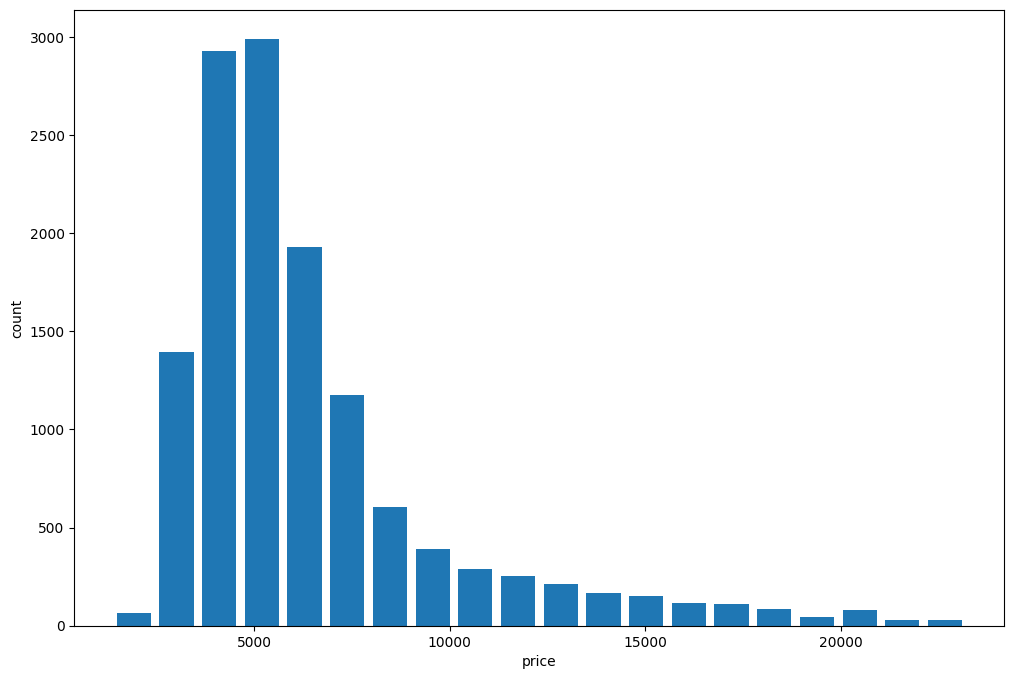

In [20]:
plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('price')
plt.ylabel('count')
plt.show()

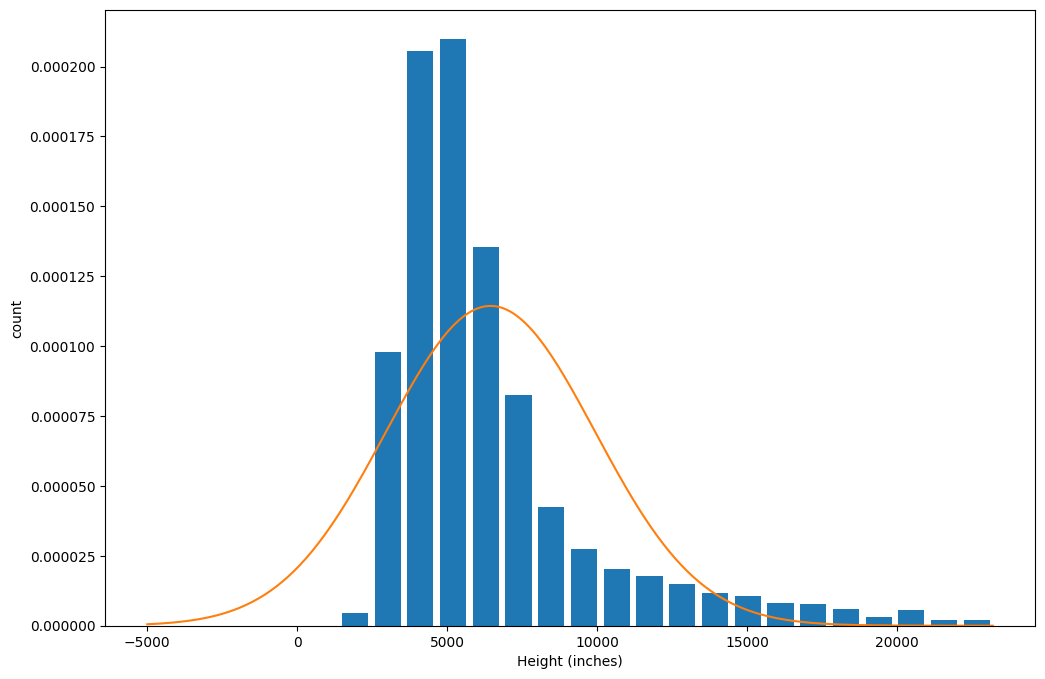

In [21]:
from scipy.stats import norm
import numpy as np

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('count')

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(), df3.price_per_sqft.std()))

# (3) Now remove outliers using z score. Use z score of 4 as your thresold

In [23]:
df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()
df2.sample(10)

C:\Users\hassa\AppData\Local\Temp\ipykernel_13256\835203842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
6727,Marathahalli,3 BHK,1385.0,2.0,68.5,3,4945,-0.415031
770,Kaggadasapura,2 BHK,1185.0,2.0,41.0,2,3459,-0.773880
5025,Whitefield,4 BHK,2155.0,3.0,125.0,4,5800,-0.208561
8885,Cox Town,4 Bedroom,1495.0,2.0,300.0,4,20066,3.236484
9889,other,6 Bedroom,1200.0,9.0,122.0,6,10166,0.845769
4801,Kengeri Satellite Town,2 BHK,1030.0,2.0,50.0,2,4854,-0.437007
6481,5th Phase JP Nagar,2 BHK,1000.0,2.0,48.0,2,4800,-0.450047
7884,Talaghattapura,3 BHK,1856.0,3.0,135.0,3,7273,0.147149
6707,other,2 BHK,1175.0,2.0,79.0,2,6723,0.014331
246,OMBR Layout,3 BHK,2420.0,3.0,185.0,3,7644,0.236740


In [25]:
outlier_z = df2[(df2.zscore < -4) | (df2.zscore > 4)]
outlier_z.shape

(125, 8)

In [26]:
outlier_z.sample(5)

,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
3816,Domlur,6 BHK,2400.0,4.0,600.0,6,25000,4.427977
13094,other,4 Bedroom,1200.0,5.0,325.0,4,27083,4.930994
9873,other,3 Bedroom,2400.0,6.0,775.0,3,32291,6.188654
1721,other,5 Bedroom,2400.0,5.0,625.0,5,26041,4.679365
8650,HAL 2nd Stage,4 Bedroom,2400.0,4.0,650.0,4,27083,4.930994


In [27]:
df4 = df2[(df2.zscore>-4) & (df2.zscore<4)]
df4.shape

(13047, 8)

In [28]:
df2.shape[0] - df4.shape[0]

125

In this step also we removed 125 outliers. The result would be exactly same as 4 standard deviation